In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("bangkok-air-quality.csv")

df = df.replace(' ', np.nan)
df = df.dropna(subset=[' pm25', ' pm10', 'date'])

df

,date,pm25,pm10,o3,no2,so2,co
0,2022/2/1,68,31,9,4,NaN,NaN
1,2022/2/2,58,35,10,6,NaN,NaN
2,2022/2/3,66,37,15,11,NaN,NaN
3,2022/2/4,73,48,17,15,1,NaN
4,2022/2/5,94,54,21,13,1,NaN
...,...,...,...,...,...,...,...
2011,2016/9/26,52,29,18,11,1,NaN
2012,2016/9/27,46,21,10,11,1,NaN
2013,2016/9/28,54,22,18,9,1,NaN
2014,2016/9/29,51,22,16,9,1,NaN


In [14]:
df[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']] = df[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].astype(float)
df[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']] = df[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].astype(pd.Int32Dtype())

df['date'] = pd.to_datetime(df['date'])

df['dayofweek'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.week
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df['date'] = df['date'].astype(int)

df['date'] = (df['date'] - df['date'].min()) / (df['date'].max() - df['date'].min())
df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())

df = df.sort_values(by='date')
df = df.reset_index(drop=True)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

df = df.sort_index()

# encode
df_day_of_week = pd.DataFrame(encoder.fit_transform(df['dayofweek'].values.reshape(-1, 1)))
df_week = pd.DataFrame(encoder.fit_transform(df['week'].values.reshape(-1, 1)))
df_day = pd.DataFrame(encoder.fit_transform(df['day'].values.reshape(-1, 1)))
df_month = pd.DataFrame(encoder.fit_transform(df['month'].values.reshape(-1, 1)))

# index
df_day_of_week.index = df.index
df_week.index = df.index
df_day.index = df.index
df_month.index = df.index



df = df.drop(['dayofweek'], 1)
df = df.drop(['week'], 1)
df = df.drop(['day'], 1)
df = df.drop(['month'], 1)

df = df.drop([' o3'], axis=1)
df = df.drop([' no2'], axis=1)
df = df.drop([' so2'], axis=1)
df = df.drop([' co'], axis=1)


df = pd.concat([df_day_of_week, df], axis=1)

df

/tmp/ipykernel_80218/57210578.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week
/tmp/ipykernel_80218/57210578.py:12: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['date'] = df['date'].astype(int)
/tmp/ipykernel_80218/57210578.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['dayofweek'], 1)
/tmp/ipykernel_80218/57210578.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['week'], 1)
/tmp/ipykernel_80218/57210578.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['

,0,1,2,3,4,5,6,date,pm25,pm10,year
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,61,19,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000494,68,24,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000989,60,20,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001483,68,25,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.001977,70,26,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.998023,145,44,1.0
2004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.998517,95,41,1.0
2005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.999011,83,40,1.0
2006,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.999506,80,48,1.0


In [15]:
X, y = df.drop([' pm25', ' pm10'], axis=1), df[[' pm25', ' pm10']]

x_train, x_test = X[:int(len(X)*0.9)], X[int(len(X)*0.9):]
y_train, y_test = y[:int(len(y)*0.9)], y[int(len(y)*0.9):]

display(x_train), display(y_train)

,0,1,2,3,4,5,6,date,year
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000494,0.000000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000989,0.000000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001483,0.000000
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.001977,0.000000
...,...,...,...,...,...,...,...,...,...
1802,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.898665,0.833333
1803,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.899160,0.833333
1804,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.899654,0.833333
1805,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.900148,0.833333


,pm25,pm10
0,61,19
1,68,24
2,60,20
3,68,25
4,70,26
...,...,...
1802,55,25
1803,51,30
1804,56,21
1805,44,22


(None, None)

In [16]:
from sklearn.neural_network import MLPRegressor

ANN = MLPRegressor(activation='relu', solver='adam', hidden_layer_sizes=(64, 64), n_iter_no_change=200, learning_rate='constant', max_iter=600000, random_state=42, verbose=True, max_fun=20000, tol=0.05)

ANN.fit(x_train, y_train)

/home/akrit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Iteration 1, loss = 2482.57902902
Iteration 2, loss = 2463.99929016
Iteration 3, loss = 2443.03394144
Iteration 4, loss = 2414.90130003
Iteration 5, loss = 2374.58865267
Iteration 6, loss = 2317.62638133
Iteration 7, loss = 2236.86312793
Iteration 8, loss = 2127.21782304
Iteration 9, loss = 1982.96540014
Iteration 10, loss = 1801.03278825
Iteration 11, loss = 1584.77991297
Iteration 12, loss = 1345.31528699
Iteration 13, loss = 1093.70228104
Iteration 14, loss = 863.97683110
Iteration 15, loss = 676.71840476
Iteration 16, loss = 546.84403344
Iteration 17, loss = 480.10875951
Iteration 18, loss = 453.19265130
Iteration 19, loss = 441.81152541
Iteration 20, loss = 434.13018322
Iteration 21, loss = 428.06932502
Iteration 22, loss = 422.91493699
Iteration 23, loss = 418.03272783
Iteration 24, loss = 413.42159911
Iteration 25, loss = 409.00508097
Iteration 26, loss = 405.14482303
Iteration 27, loss = 401.49965235
Iteration 28, loss = 397.74005520
Iteration 29, loss = 394.02553694
Iteration 

MLPRegressor(hidden_layer_sizes=(64, 64), max_fun=20000, max_iter=600000,
             n_iter_no_change=200, random_state=42, tol=0.05, verbose=True)

/home/akrit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


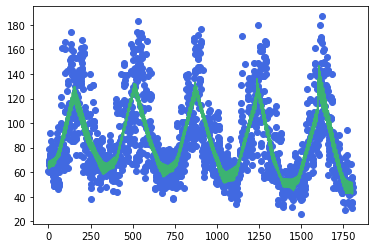

In [17]:
prediction = ANN.predict(x_train)
prediction = np.array(prediction)


plt.scatter([i for i in range(len(prediction[:,0]))], y_train.values[:,0], color='royalblue')
plt.plot([i for i in range(len(prediction[:,0]))], prediction[:,0], color='mediumseagreen')

/home/akrit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


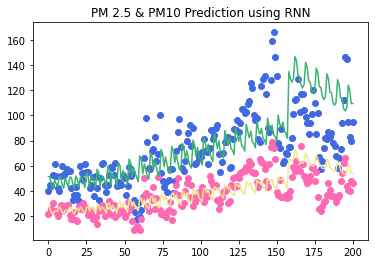

In [18]:
prediction = ANN.predict(x_test)
prediction = np.array(prediction)


plt.scatter([i for i in range(len(prediction[:,0]))], y_test.values[:,0], color='royalblue')
plt.plot([i for i in range(len(prediction[:,0]))], prediction[:,0], color='mediumseagreen')

plt.scatter([i for i in range(len(prediction[:,0]))], y_test.values[:,1], color='hotpink')
plt.plot([i for i in range(len(prediction[:,0]))], prediction[:,1], color='khaki')

plt.title('PM 2.5 & PM10 Prediction using RNN')
plt.show()